# **Rodrigo_Mesquita_DR3_TP2**
## **Inteligência Artificial: Classificação [24E2_3]**

# 1.Carregue o dataset "Titanic" para um dataframe utilizando linguagem Python e execute as seguintes transformações, utilizando a biblioteca Pandas:


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, RocCurveDisplay
from sklearn import tree
from sklearn import metrics

In [29]:
df = pd.read_csv('/content/drive/MyDrive/Faculdade/Colab Notebooks/Datasets/DR3_TP1_Titanic.csv')

### a.Elimine as variáveis “PassengerId”,”Name”,”Ticket” e “Cabin”;

In [30]:
df= df.drop(columns=['PassengerId','Name','Ticket','Cabin'])

### b.Elimine observações que contenham dados ausentes (NA);


In [31]:
lines = df.shape[0]
print(lines)
nulls = df.isnull().sum()
print(nulls)

891
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


In [32]:
df = df.dropna()

In [33]:
lines = df.shape[0]
print(lines)
nulls = df.isnull().sum()
print(nulls)

712
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


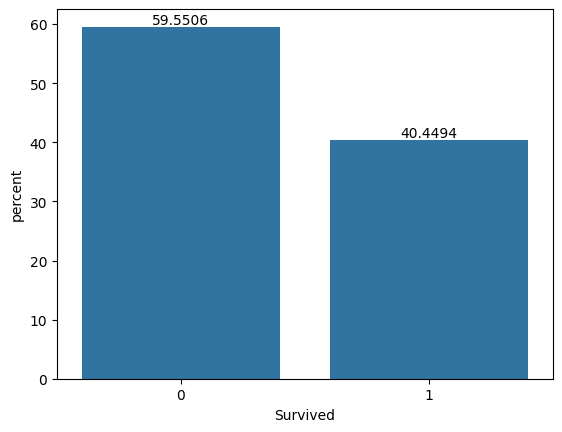

In [34]:
ax = sns.countplot(df, x='Survived', stat="percent")
ax.bar_label(ax.containers[0], fontsize=10);

### c.Aplique o LabelEncoder nas variáveis “Embarked” e “Sex”;


In [35]:
encoder = LabelEncoder()
df['Embarked'] = encoder.fit_transform(df['Embarked'])
df['Sex'] = encoder.fit_transform(df['Sex'])

### d.Separe o dataframe resultante em Treino-Teste, utilizando a proporção 70-30%.


In [36]:
df_x = df.drop(columns=['Survived'])
df_y = df['Survived']

In [37]:
x_train, x_test, y_train, y_test = train_test_split(df_x,df_y, test_size=0.3, random_state = 20)

# 2.A partir do dataframe totalmente transformado do item 1, aplique um modelo de árvore de decisão. Apresente as métricas acurácia, precision, recall e F1-score deste modelo. Apresente também a matriz de confusão resultante do processo de treinamento. Utilize apenas as opções default do modelo.


In [38]:
#Treinando o modelo
clf = DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

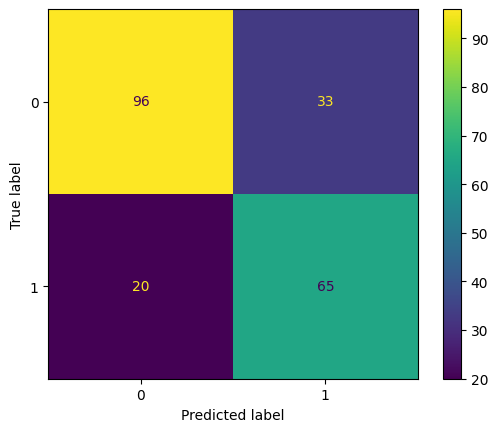

In [39]:
# Avaliando o resultado
cm = metrics.confusion_matrix(y_test, y_pred)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [40]:
# Precision, Recall, F1-Score e Acurácia
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78       129
           1       0.66      0.76      0.71        85

    accuracy                           0.75       214
   macro avg       0.75      0.75      0.75       214
weighted avg       0.76      0.75      0.75       214



# 3.Crie uma visualização da árvore gerada.


In [41]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (50,50), dpi=300)
tree.plot_tree(clf, filled=True)
fig.savefig('tree_sklearn.png')

Output hidden; open in https://colab.research.google.com to view.

# 4.Represente a qualidade do processo de treinamento do modelo através de Curvas de aprendizado.

#Curva de Aprendizado para o Max_depth

In [42]:
valor_depth = list(range(2,31,2))
train_yhat, train_acc,train_scores,test_yhat,test_acc,test_scores = [],[],[],[],[],[]

for d in valor_depth:
    clf = DecisionTreeClassifier(max_depth = d, random_state=42)
    clf = clf.fit(x_train, y_train)
    y_pred = pd.DataFrame(clf.predict(x_test))

    #Avaliar score com dados de treino
    train_yhat = clf.predict(x_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)

    #Avaliar score com dados de teste
    test_yhat = clf.predict(x_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)

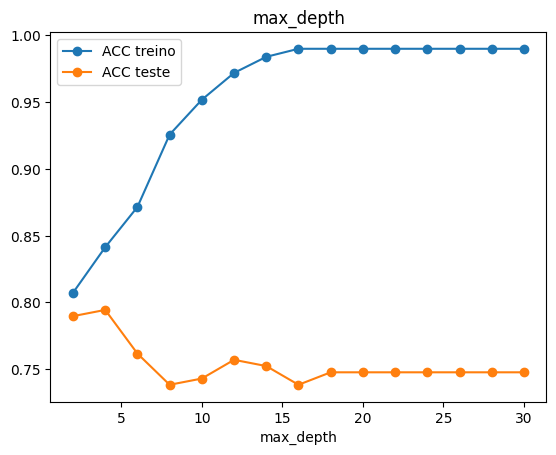

In [43]:
plt.plot(valor_depth, train_scores, '-o', label='ACC treino')
plt.plot(valor_depth, test_scores, '-o', label='ACC teste')
plt.xlabel('max_depth')
plt.title('max_depth')
plt.legend()
plt.show()

#Curva de Aprendizado para o Min_samples_split

In [44]:
min_samples_split = [2, 5, 10, 20, 40, 80, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600]
train_yhat, train_acc,train_scores,test_yhat,test_acc,test_scores = [],[],[],[],[],[]

for i in min_samples_split:
    clf = DecisionTreeClassifier(min_samples_split = i, random_state=42)
    clf = clf.fit(x_train, y_train)
    y_pred = pd.DataFrame(clf.predict(x_test))

    #Avaliar score com dados de treino
    train_yhat = clf.predict(x_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)

    #Avaliar score com dados de teste
    test_yhat = clf.predict(x_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)

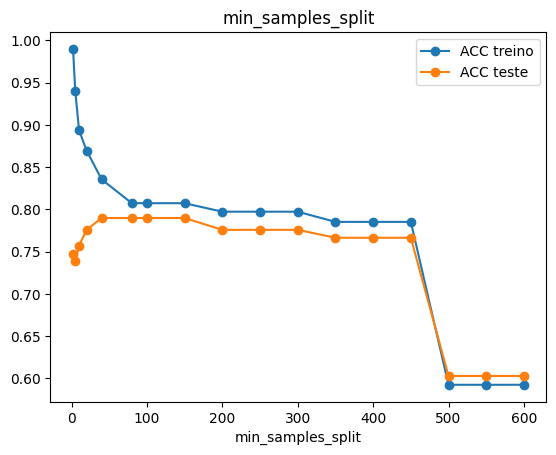

In [45]:
plt.plot(min_samples_split, train_scores, '-o', label='ACC treino')
plt.plot(min_samples_split, test_scores, '-o', label='ACC teste')
plt.title('min_samples_split')
plt.xlabel('min_samples_split')
plt.legend()
plt.show()

# Calculando a curva ROC para o modelo com max_depth = 4 e min_samples_split = 80

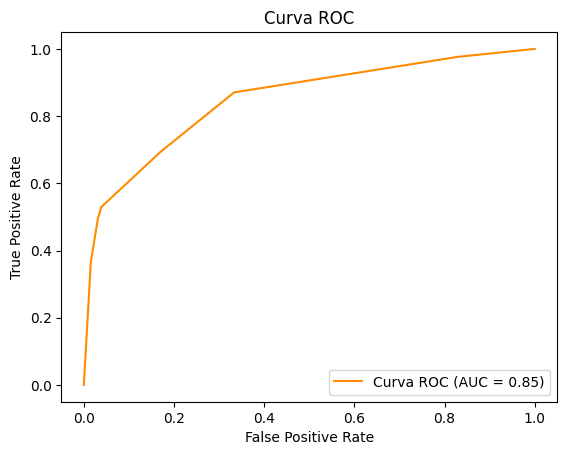

In [46]:
#Curva ROC
clf = DecisionTreeClassifier(max_depth = 4, min_samples_split = 80)
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

display = RocCurveDisplay.from_estimator(
        clf,
        x_test,
        y_test,
        name="Curva ROC",
        color="darkorange",
    )
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Curva ROC",
)

plt.show()